<h1> Análisis Hubspot </h1>

<h3> Librerias y requerimientos. </h3>

In [1]:
#!pip install -r requirements.txt

- Importar librerias.

In [2]:
import pandas as pd
import warnings
from datetime import date
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
fecha = date.today().strftime('%Y-%m-%d')

<h3> 3. Hubspot. </h3>

<h4> 3.1. Preprocesamiento de datos. </h4>

In [4]:
#Cargue de datos
df = pd.read_excel('hubspot-crm-Challenge.xlsx')
df.shape

(178, 49)

In [5]:
#Tipo de datos por variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Record ID                                              178 non-null    int64  
 1   Motivo de cierres ganados                              12 non-null     object 
 2   Valor anual del contrato                               0 non-null      float64
 3   Pipeline                                               178 non-null    object 
 4   Tech Sales                                             1 non-null      object 
 5   Valor del negocio previsto en la moneda local          178 non-null    float64
 6   Paso siguiente                                         0 non-null      float64
 7   Campaña de última reserva en herramienta de reuniones  0 non-null      float64
 8   Probabilidad prevista                             

- Se extraen las variables con completitud mayor al 40%.

In [6]:
#Completitud de datos
df_2 = pd.DataFrame(df.count(axis=0)).reset_index().rename(columns={'index':'Variable',0:'Num Datos'})
n_datos = df['Record ID'].count()
df_2['Completitud'] = df_2['Num Datos'] / n_datos

variables_interes = df_2[df_2['Completitud'] >= 0.4].reset_index(drop=True)['Variable']

print(f"- Variables Iniciales: {len(df_2)}")
print(f"- Variables Completitud > 40%: {len(variables_interes)}")
df_2[df_2['Completitud'] >= 0.4].reset_index(drop=True)

- Variables Iniciales: 49
- Variables Completitud > 40%: 22


,Variable,Num Datos,Completitud
0,Record ID,178,1.000000
1,Pipeline,178,1.000000
2,Valor del negocio previsto en la moneda local,178,1.000000
3,Tipo de negocio,154,0.865169
4,Número de veces contactado,102,0.573034
5,Número de actividades de ventas,102,0.573034
6,Tipo de fuente original,151,0.848315
7,Importe previsto,178,1.000000
8,Propietario del negocio,178,1.000000
9,Etapa del negocio,178,1.000000


In [7]:
#Dataframe filtrado
df_f = df.loc[:, df.columns.isin(variables_interes)]

#Se retiran variables categóricas descriptivas: Pipeline, Associated Contact IDs, Associated Company IDs
df_f = df_f[['Record ID', 'Valor del negocio previsto en la moneda local', 'Tipo de negocio',
       'Número de veces contactado', 'Número de actividades de ventas', 'Tipo de fuente original', 
        'Importe previsto','Propietario del negocio', 'Etapa del negocio', 'Creado por ID de usuario', 
        'Número de contactos asociados','Datos de fuente original 1', 'Valor del negocio previsto',
       'Datos de fuente original 2', 'Probabilidad de la etapa del negocio', 'Valor', 'Prioridad',
        'Monto en la moneda de la empresa']]

df_f.shape

(178, 18)

<h4> 3.2. Análisis Explotario. </h4>

3.2.1. <strong>Variables numéricas.</strong>

In [8]:
#Descripción de Variables Numéricas
df_f.describe()

,Record ID,Valor del negocio previsto en la moneda local,Número de veces contactado,Número de actividades de ventas,Importe previsto,Número de contactos asociados,Valor del negocio previsto,Probabilidad de la etapa del negocio,Valor,Monto en la moneda de la empresa
count,1.780000e+02,178.000000,102.000000,102.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,8.110424e+09,160.388090,1.303922,4.568627,260.868539,1.022472,160.388090,0.429775,260.868539,260.868539
std,1.356659e+09,920.291227,2.903699,5.211392,921.237323,1.318941,920.291227,0.355841,921.237323,921.237323
min,5.354079e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.304657e+09,0.000000,0.000000,1.000000,90.000000,0.000000,0.000000,0.000000,90.000000,90.000000
50%,8.114060e+09,57.600000,0.000000,2.000000,176.400000,1.000000,57.600000,0.400000,176.400000,176.400000
75%,9.358594e+09,114.120000,1.000000,6.000000,216.000000,1.000000,114.120000,0.750000,216.000000,216.000000
max,9.690946e+09,12250.800000,17.000000,28.000000,12250.800000,9.000000,12250.800000,1.000000,12250.800000,12250.800000


<AxesSubplot:>

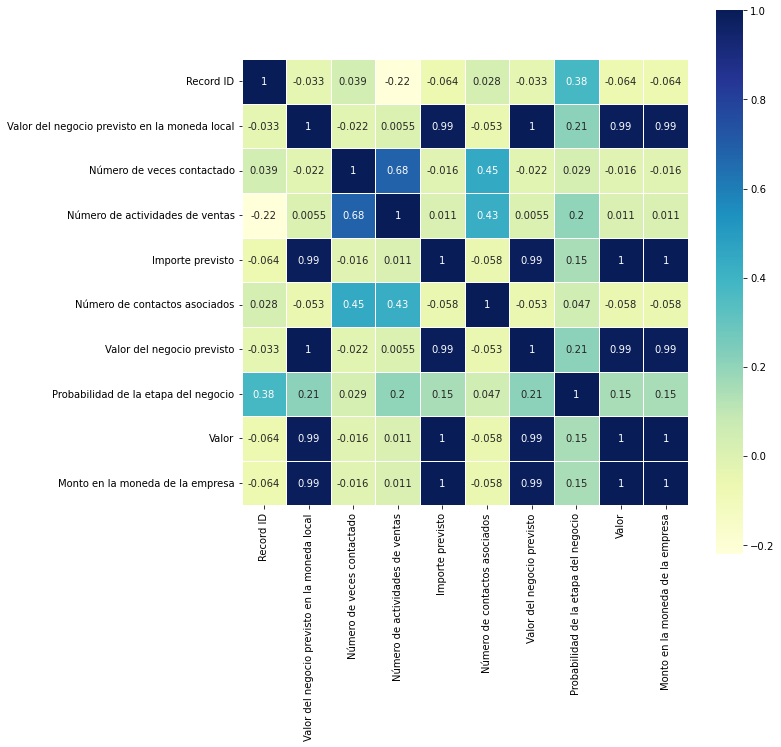

In [9]:
#Correlaciones iniciales en variables numéricas.
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(df_f.corr(), 
        xticklabels=df_f.corr().columns,
        yticklabels=df_f.corr().columns,
        annot = True, linewidths=.5, cmap="YlGnBu",
        square = True,)

<AxesSubplot:>

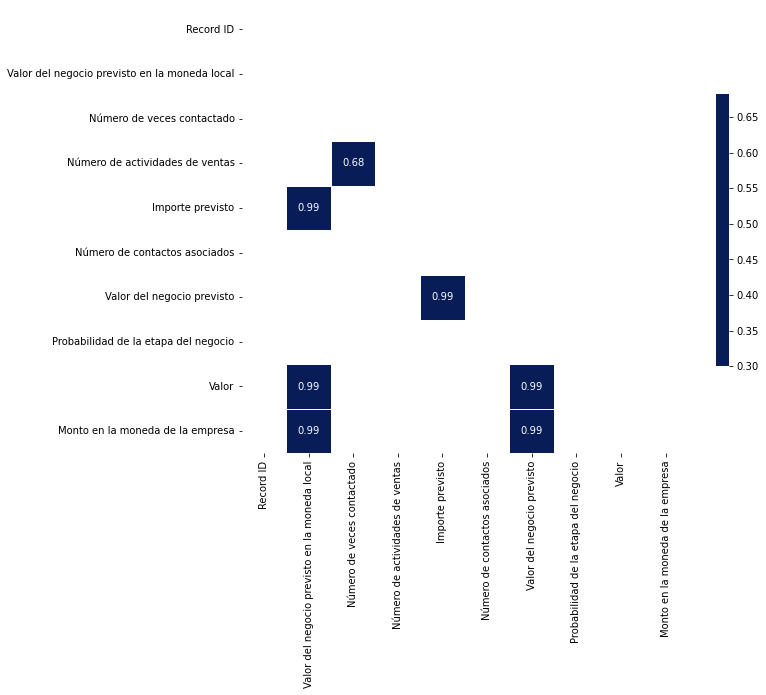

In [10]:
#Variables de correslaciones mayores al ABS(60%)
fig, ax = plt.subplots(figsize=(10,10)) 
#Correlaciones significativas
df_f_corr = df_f.corr()
df_f_corr = df_f_corr[((df_f.corr() >= 0.6) & (df_f.corr() < 1)) | ((df_f.corr() <= -0.6) & (df_f.corr() > -1))]

mask = np.triu(np.ones_like(df_f_corr, dtype=bool))

sns.heatmap(df_f_corr, 
        mask=mask, vmax=.3, center=0,           
        annot = True, linewidths=.5, cmap="YlGnBu",
        square = True,cbar_kws={"shrink": .5})

- Las correlaciones significativas mayores al 60%, pertenecen a valores monetarios dependientes los cuales hacen una correlación descartable.


- Existe una correlación del 68% entre el número de actividades de ventas y el número de veces contactado, explicada porque cada contacto al lead pertenece supone una o más actividades de ventas. Sin embargo es variable de interés para supervisar su comportamiento medio.

array([[<AxesSubplot:title={'center':'Record ID'}>,
        <AxesSubplot:title={'center':'Valor del negocio previsto en la moneda local'}>,
        <AxesSubplot:title={'center':'Número de veces contactado'}>],
       [<AxesSubplot:title={'center':'Número de actividades de ventas'}>,
        <AxesSubplot:title={'center':'Importe previsto'}>,
        <AxesSubplot:title={'center':'Número de contactos asociados'}>],
       [<AxesSubplot:title={'center':'Valor del negocio previsto'}>,
        <AxesSubplot:title={'center':'Probabilidad de la etapa del negocio'}>,
        <AxesSubplot:title={'center':'Valor'}>],
       [<AxesSubplot:title={'center':'Monto en la moneda de la empresa'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

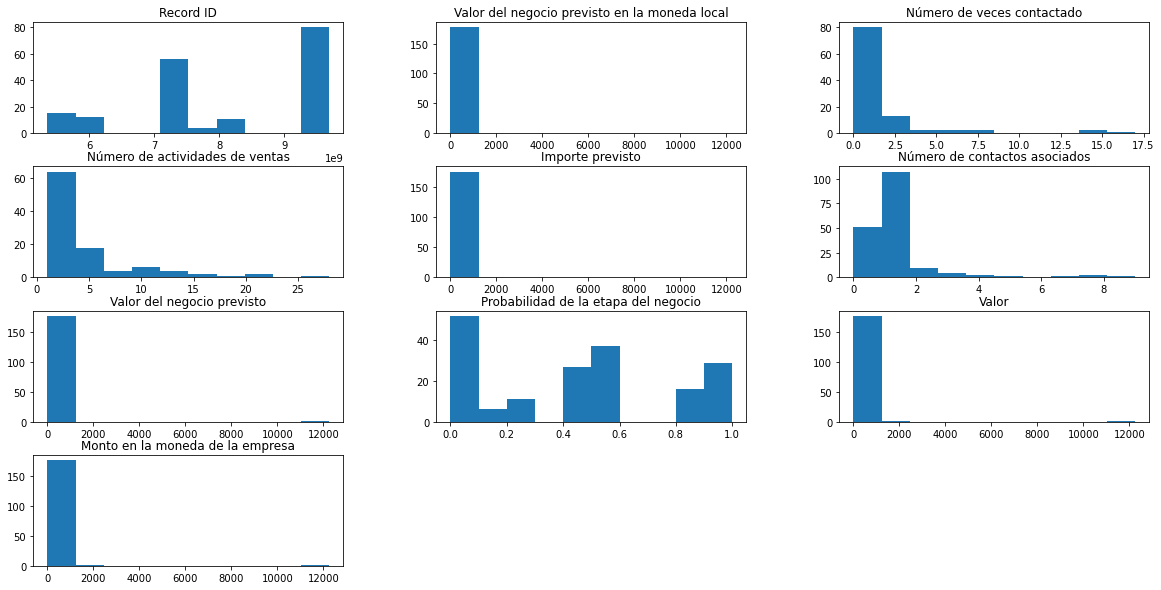

In [11]:
#Variables de correslaciones mayores al ABS(60%)
plt.rcParams['figure.figsize'] = (20, 10)
df_f.hist(grid = False)

In [12]:
df_f.describe()

,Record ID,Valor del negocio previsto en la moneda local,Número de veces contactado,Número de actividades de ventas,Importe previsto,Número de contactos asociados,Valor del negocio previsto,Probabilidad de la etapa del negocio,Valor,Monto en la moneda de la empresa
count,1.780000e+02,178.000000,102.000000,102.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,8.110424e+09,160.388090,1.303922,4.568627,260.868539,1.022472,160.388090,0.429775,260.868539,260.868539
std,1.356659e+09,920.291227,2.903699,5.211392,921.237323,1.318941,920.291227,0.355841,921.237323,921.237323
min,5.354079e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.304657e+09,0.000000,0.000000,1.000000,90.000000,0.000000,0.000000,0.000000,90.000000,90.000000
50%,8.114060e+09,57.600000,0.000000,2.000000,176.400000,1.000000,57.600000,0.400000,176.400000,176.400000
75%,9.358594e+09,114.120000,1.000000,6.000000,216.000000,1.000000,114.120000,0.750000,216.000000,216.000000
max,9.690946e+09,12250.800000,17.000000,28.000000,12250.800000,9.000000,12250.800000,1.000000,12250.800000,12250.800000


- Los valores de negocio en moneda local están previstos en media de 160,38. Existen negocios que han sido descritos en 12250.8.

- El número de actividades de ventas medio es de 4.5 por negocio, siendo hasta 6 en el 75% de los casos.

- En promedio la probabilidad de la etapa del negocio es del 43%, con valores medios de 260.8.

3.2.2. <strong>Variables categóricas</strong>

In [13]:
#Descripción de Variables Categóricas
df_f.describe(include='O')

,Tipo de negocio,Tipo de fuente original,Propietario del negocio,Etapa del negocio,Creado por ID de usuario,Datos de fuente original 1,Datos de fuente original 2,Prioridad
count,154,151,178,178,178,146,136,151
unique,2,3,6,10,6,3,8,3
top,Cliente nuevo,Fuentes sin conexión,simo,Descalificados,simo,CONTACTS,userId:24821530,Alta
freq,136,146,55,49,55,95,84,74


<AxesSubplot:xlabel='Tipo de negocio', ylabel='Número de actividades de ventas'>

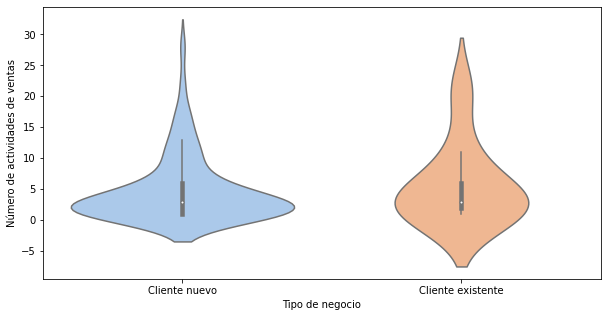

In [14]:
plt.rcParams['figure.figsize'] = (10, 5)
df_aux = df_f[['Número de actividades de ventas','Tipo de negocio']]
sns.violinplot(y=df_aux['Número de actividades de ventas'],x='Tipo de negocio',data=df_f,palette='pastel')

In [15]:
df_aux.groupby('Tipo de negocio').describe()

Número de actividades de ventas                           \
                                            count      mean       std  min   
Tipo de negocio                                                              
Cliente existente                             9.0  5.666667  6.557439  1.0   
Cliente nuevo                                81.0  4.827160  5.314579  1.0   

                                        
                   25%  50%  75%   max  
Tipo de negocio                         
Cliente existente  2.0  3.0  6.0  21.0  
Cliente nuevo      1.0  3.0  6.0  28.0

- En clientes nuevos, en media se estiman de 4 a 5 actividades de ventas, a diferencia de los clientes existentes que requieren de 5 a 7 actividades. Sin embargo, estos últimos presentan menor completitud de los datos, por lo cual las actividades de ventas en clientes existentes no son exlusivas.

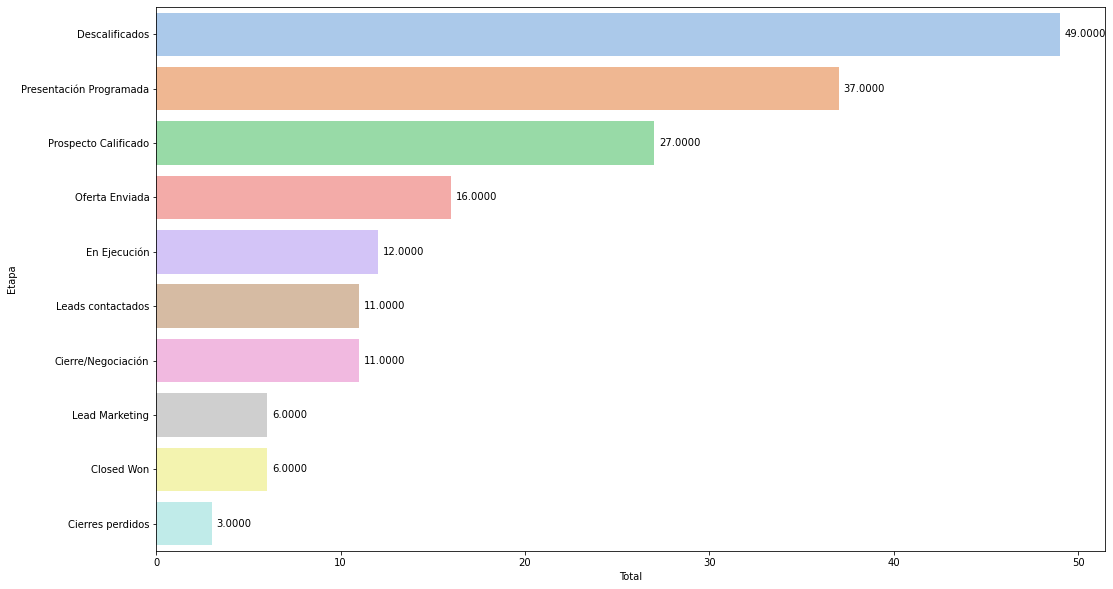

In [16]:
plt.rcParams['figure.figsize'] = (17, 10)
df_aux = df_f['Etapa del negocio'].value_counts().rename_axis('Etapa').reset_index(name='Total')
ax = sns.barplot(x='Total',y='Etapa',data=df_aux,orient='h', palette='pastel', ci=None)

for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

- El 29,21% de los clientes (52) se consideran no habilitados al estar en estados como perdidos o descalificados, sin embargo esto puede ser un indicador para evaluar su comportamiento.


- El 33,14%  de los clientes se encuentran en etapas intermedias o finales de negociación, de los cuales en cierre se encuentran el 37% (11) y finalizados el 20% (6).

In [17]:
df_aux = df_f[['Record ID','Tipo de negocio','Etapa del negocio']]
df_aux = df_aux.groupby(['Tipo de negocio','Etapa del negocio']).count().reset_index().rename(columns={'Record ID':'Clientes'})

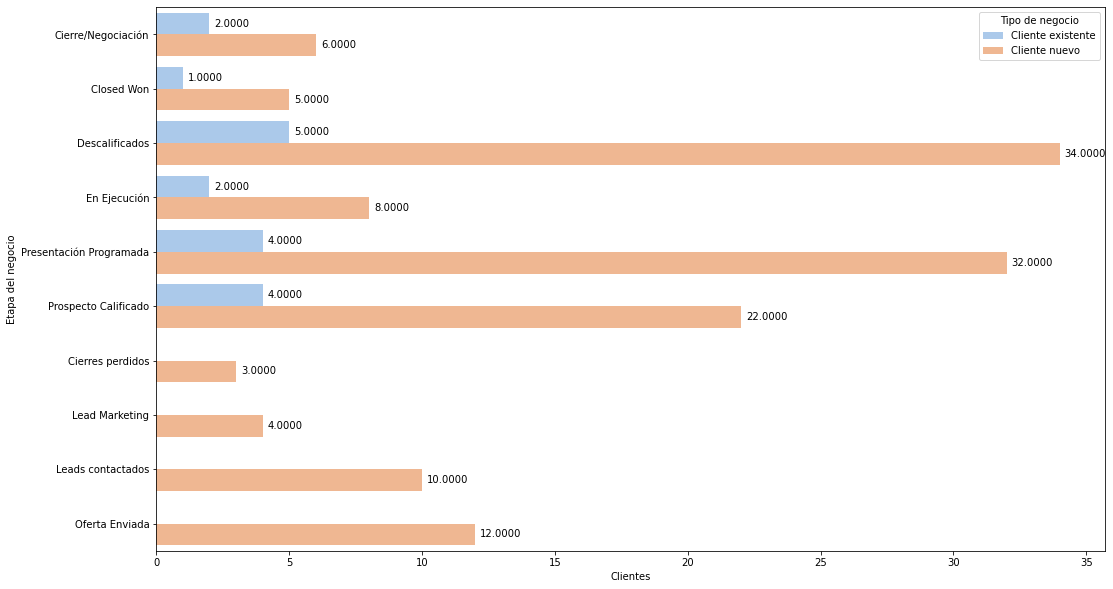

In [18]:
plt.rcParams['figure.figsize'] = (17, 10)
ax = sns.barplot(x='Clientes',y='Etapa del negocio',hue = 'Tipo de negocio', data=df_aux,orient='h', palette='pastel', ci=None)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

- Los clientes existentes se encuentran asociados a etapas no relacionadas a leads, sino a etapas de calificación, ejecución, negociación y finalización.

- En los clientes nuevos, la tasa de descarte es del 27,2% en etapas de descalificación o cierres perdidos. Del valor restante, el 11,11% se encuentra en etapas de cierre, aproximadamente 4 veces más que los clientes existentes.

<h4> 3.3. Modelamiento. </h4>

In [19]:
#Librerias de modelamiento
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [20]:
col_interes = df_f.describe(include=np.number).columns

#Filtrar solo clientes nuevos
df_f = df_f[df_f['Tipo de negocio'] == 'Cliente nuevo'].reset_index(drop=True)
df_f = df_f.reset_index(drop=True)

#Columnas numéricas
df_model = df_f[col_interes]

In [21]:
df_model.columns

Index(['Record ID', 'Valor del negocio previsto en la moneda local',
       'Número de veces contactado', 'Número de actividades de ventas',
       'Importe previsto', 'Número de contactos asociados',
       'Valor del negocio previsto', 'Probabilidad de la etapa del negocio',
       'Valor', 'Monto en la moneda de la empresa'],
      dtype='object')

In [22]:
df_model = df_model.dropna(axis=0).reset_index(drop=True)

In [23]:
for i in range(len(df_model)):
    if df_model.loc[i,'Probabilidad de la etapa del negocio'] < 0.3:
        df_model.loc[i,'Clase'] = "Baja"
    elif (df_model.loc[i,'Probabilidad de la etapa del negocio'] >= 0.3) and (df_model.loc[i,'Probabilidad de la etapa del negocio'] < 0.7):
        df_model.loc[i,'Clase'] = "Media"
    elif (df_model.loc[i,'Probabilidad de la etapa del negocio'] >= 0.7):
        df_model.loc[i,'Clase'] = "Alta"

In [24]:
#Selección de variables
X = df_model[['Valor del negocio previsto en la moneda local',
       'Número de veces contactado', 'Número de actividades de ventas',
       'Importe previsto', 'Número de contactos asociados',
       'Valor del negocio previsto', 'Valor', 'Monto en la moneda de la empresa']]

y = df_model[['Clase']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [25]:
#Inicialización del modelo
tree_c = DecisionTreeClassifier()

#Entrenamiento del modelo
tree_c.fit(X_train, y_train)

#Prediccióm en prueba
y_pred = tree_c.predict(X_test)

In [26]:
confusion_matrix = confusion_matrix(y_test, y_pred)

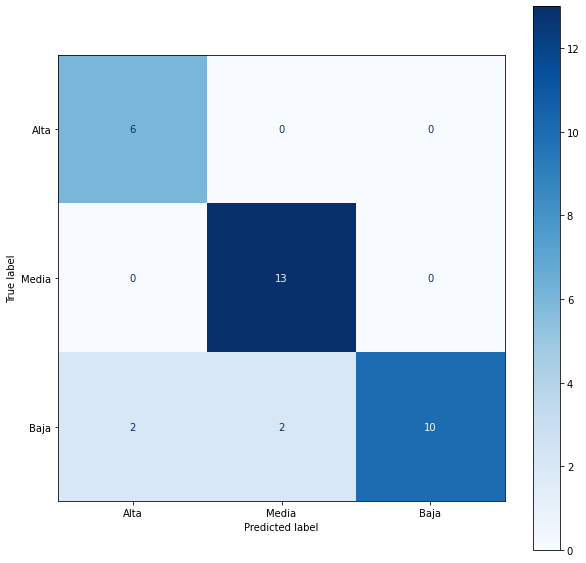

In [27]:
plt.rcParams['figure.figsize'] = (10, 10)
matriz = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Alta','Media','Baja'])
matriz.plot(cmap='Blues')
plt.show()

In [28]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred, average='weighted')

print(f"- Presicion: {Precision*100}%.\n- Accuracy: {Accuracy*100}%.")

- Presicion: 90.2020202020202%.
- Accuracy: 87.87878787878788%.


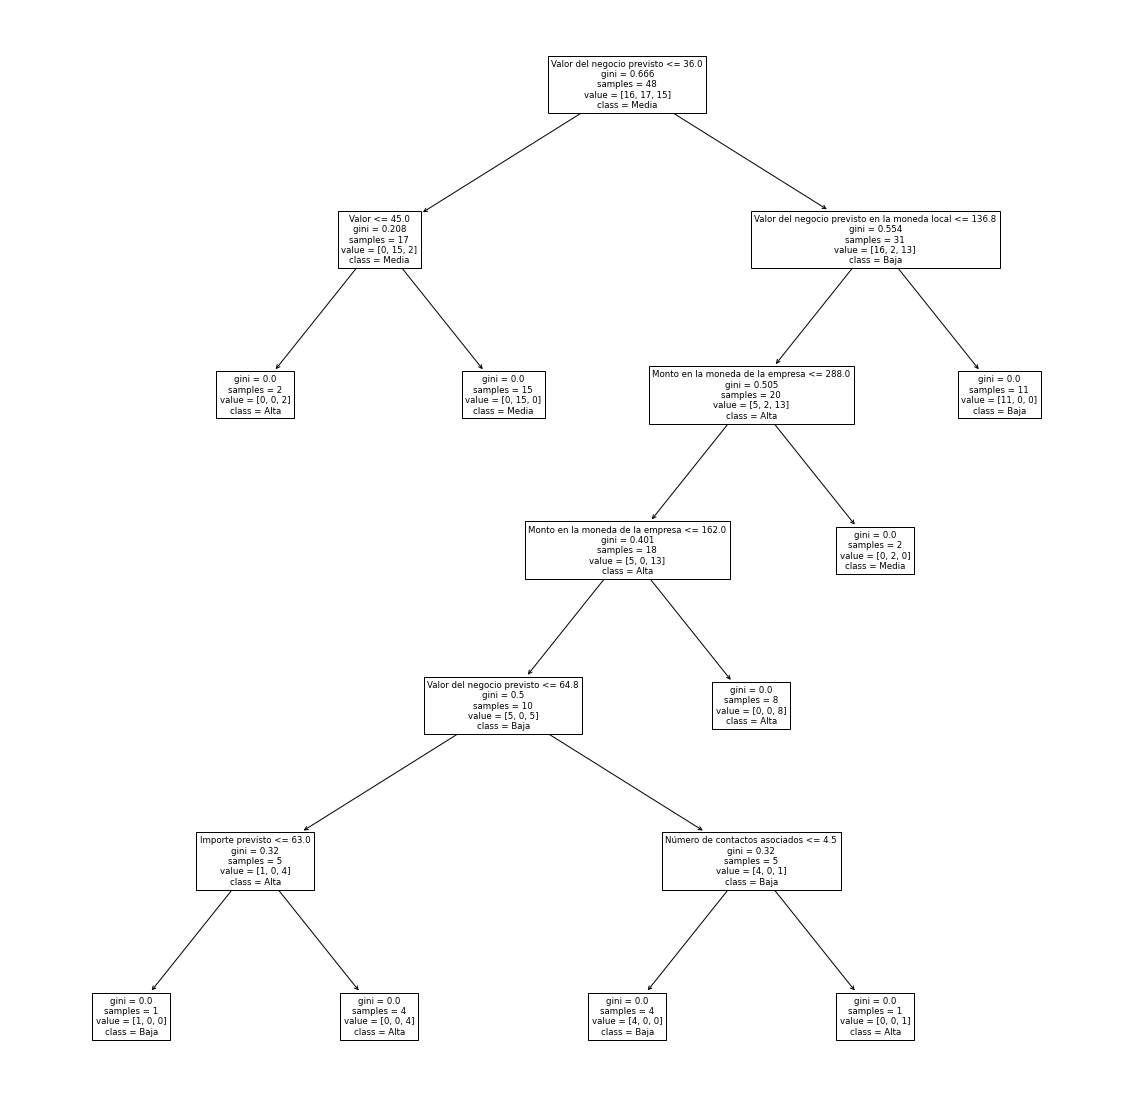

In [29]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(tree_c,feature_names=X.columns,class_names=['Baja','Media','Alta'])
fig.savefig('Decision Tree.jpeg')